<a href="https://colab.research.google.com/github/tuilatoan15/6351071071_Lab3/blob/main/6351071071_LAB3_Bai5(Trang29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Hữu Toàn – 6351071071
Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non

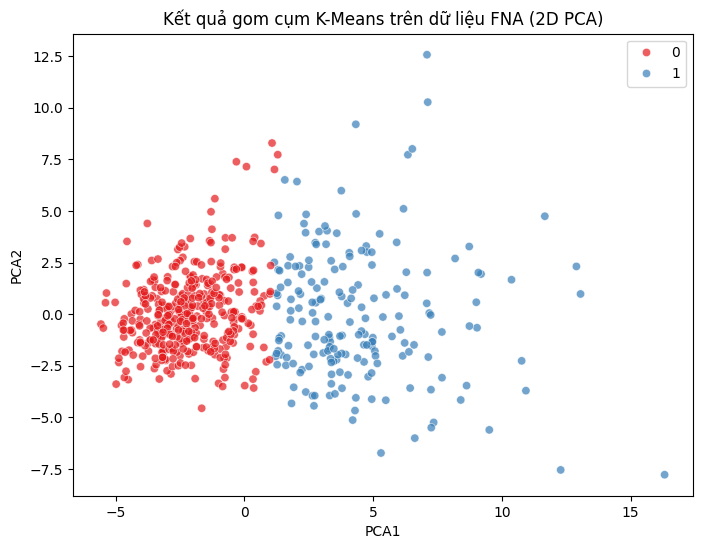

In [5]:
print("Nguyễn Hữu Toàn – 6351071071")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

columns = ['ID', 'Diagnosis',
           'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
           'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

data = pd.read_csv('wdbc.data', header=None, names=columns)

print("Thông tin dữ liệu:")
print(data.info())
print("\nSố mẫu lành tính (B):", (data['Diagnosis']=='B').sum())
print("Số mẫu ác tính (M):", (data['Diagnosis']=='M').sum())

X = data.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, labels)
print("Silhouette score:", sil_score)

labels_true = data['Diagnosis'].map({'B':0,'M':1}).values
labels_map = np.zeros_like(labels)
for i in range(2):
    mask = (labels == i)
    labels_map[mask] = mode(labels_true[mask])[0]

accuracy = accuracy_score(labels_true, labels_map)
print("Accuracy so với nhãn thực tế:", accuracy)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_map, palette='Set1', alpha=0.7)
plt.title('Kết quả gom cụm K-Means trên dữ liệu FNA (2D PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
